In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Reading the data
df = pd.read_excel('SIM_vs_CONTROL_transcripts_DEAAA.xls')

# Info and columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16538 entries, 0 to 16537
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transcript        16538 non-null  object 
 1   SIM.value         16538 non-null  float64
 2   CONTROL.value     16538 non-null  float64
 3   log2foldchange    16238 non-null  float64
 4   FC                15928 non-null  float64
 5   FR                15928 non-null  object 
 6   pvalue            16538 non-null  float64
 7   padjust           16538 non-null  float64
 8   significance      16538 non-null  bool   
 9   gene_id           16538 non-null  object 
 10  gene_name         16538 non-null  object 
 11  gene_description  16538 non-null  object 
 12  Unnamed: 12       0 non-null      float64
 13  Unnamed: 13       0 non-null      float64
 14  Unnamed: 14       0 non-null      float64
 15  Unnamed: 15       0 non-null      float64
 16  Unnamed: 16       2 non-null      object

In [3]:
# Convert 'FR' column to float, to avoid errors
df['FR'] = pd.to_numeric(df['FR'], errors='coerce') 
df['FR'] = df['FR'].astype(float)

#Checking a few values of the column "FR"
print(df['FR'].head(5))

0    -1.380338
1    -1.363362
2     1.267705
3     1.132076
4    46.217437
Name: FR, dtype: float64


## Query 1 - Selecting the transcripts/genes that meet the following 3 conditions:
1. FR > +- 1.5
2. pvalue < 0.05
3. padj < 0.2

In [4]:
# Selecting/filtering according to the above conditions
df_query1 = df.query('FR > 1.5 | FR < -1.5', inplace=False)
df_query1.query('pvalue < 0.05', inplace=True)
df_query1.query('padjust < 0.2', inplace=True)

print(len(df_query1))
# print(df_query1)

1513


/var/folders/40/1v6nmn_x7cd6x6f4nhd19fh40000gn/T/ipykernel_2691/3865521917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query1.query('pvalue < 0.05', inplace=True)
/var/folders/40/1v6nmn_x7cd6x6f4nhd19fh40000gn/T/ipykernel_2691/3865521917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query1.query('padjust < 0.2', inplace=True)


## Query 2 - Selecting the transcripts/genes that meet the following 3 conditions:
1. FR > +- 2.0
2. pvalue < 0.05
3. padj < 0.05

In [5]:
# Selecting/filtering according to the above conditions
df_query2 = df.query('FR > 2 | FR < -2', inplace=False)
df_query2.query('pvalue < 0.05', inplace=True)
df_query2.query('padjust < 0.05', inplace=True)

print(len(df_query2))

154


/var/folders/40/1v6nmn_x7cd6x6f4nhd19fh40000gn/T/ipykernel_2691/2377230132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query2.query('pvalue < 0.05', inplace=True)
/var/folders/40/1v6nmn_x7cd6x6f4nhd19fh40000gn/T/ipykernel_2691/2377230132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query2.query('padjust < 0.05', inplace=True)


# Plots of query 1 - FR values 

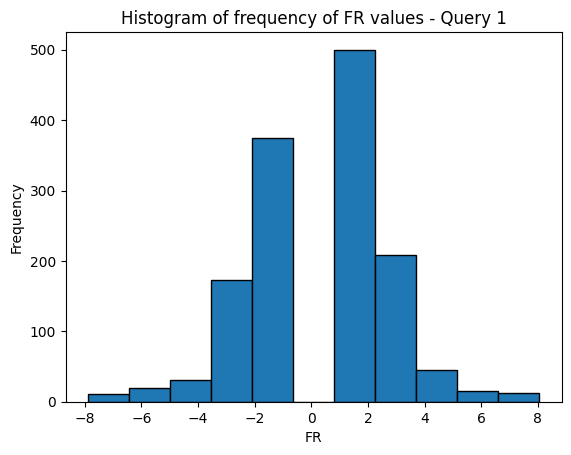

[Text(0.5, 1.0, 'Violin plot of frequency of FR values - Query 1')]

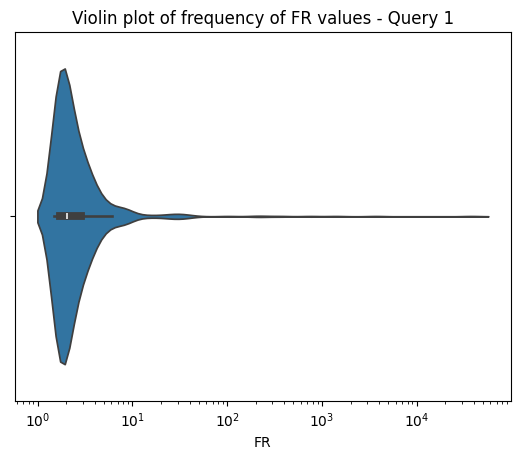

In [53]:
# Calculating the interquartile range to exclude outliers
Q1 = np.percentile(df_query1['FR'], 25)
Q3 = np.percentile(df_query1['FR'], 75)
IQR = Q3 - Q1

# The range for the histogram (to exclude outliers)
hist_range = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

# Plotting the histogram
plt.hist(df_query1['FR'], bins=11, range=hist_range,edgecolor='black')
plt.xlabel('FR')
plt.ylabel('Frequency')
plt.title('Histogram of frequency of FR values - Query 1')
plt.show()
#-----------------------------------------------------------------------------------------------
# Violin plot
sns.violinplot(x=df_query1['FR'], log_scale=True).set(title = 'Violin plot of frequency of FR values - Query 1')

# Plots of query 2 - FR values

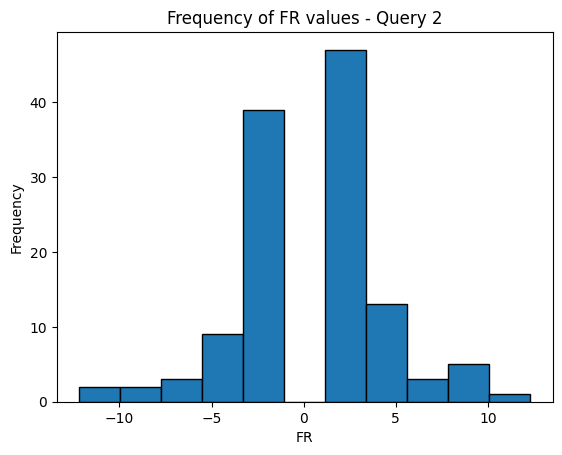

[Text(0.5, 1.0, 'Violin plot of frequency of FR values - Query 2')]

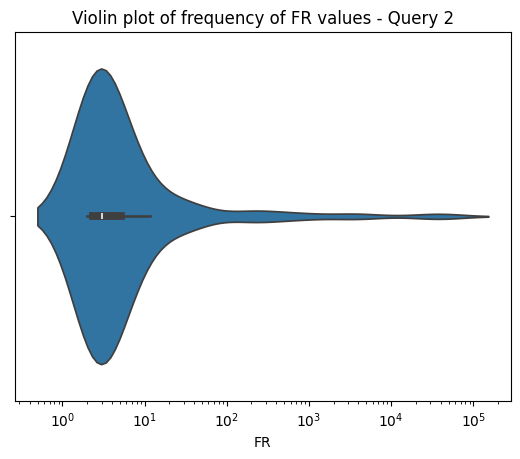

In [56]:
# Calculating the interquartile range to exclude outliers
Q1 = np.percentile(df_query2['FR'], 25)
Q3 = np.percentile(df_query2['FR'], 75)
IQR = Q3 - Q1

# The range for the histogram (to exclude outliers)
hist_range = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

# Plotting the histogram
plt.hist(df_query2['FR'], bins=11, range=hist_range, edgecolor='black')
plt.xlabel('FR')
plt.ylabel('Frequency')
plt.title('Frequency of FR values - Query 2')
plt.show()
#-----------------------------------------------------------------------------------------------
# Violin plot
sns.violinplot(x=df_query2['FR'], log_scale=True).set(title = 'Violin plot of frequency of FR values - Query 2')

# Sorted query 1 - ascending 

In [8]:
df_query1_sorted = df_query1.sort_values('FR')
# df_query1_sorted.head(5)

# Writing new dataframes to excel sheet

In [9]:
writer = pd.ExcelWriter("SIM_vs_Control_filtered.xlsx", engine="xlsxwriter")

# Saving the first query to a new excel file
df_query1.to_excel(writer,sheet_name='FR>1.5,pvalue<0.05,padj<0.2' ,index=False)

# Saving the second query to an excel file
df_query2.to_excel(writer,sheet_name='FR>2.0,pvalue<0.05,padj<0.05' ,index=False)

# Saving the sorted query 1 to a new excel file
df_query1_sorted.to_excel(writer,sheet_name='Query 1 sorted by FR' ,index=False)

# Closing the excel writer and outputting the Excel file
writer.close()